In [31]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_openml
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mushroom_data = fetch_openml(name='mushroom', version=1)

In [32]:
mushroom_data.data.shape

(8124, 22)

In [33]:
mushroom_data = mushroom_data.frame

In [34]:
mushroom_data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [35]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises%3F                8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

In [36]:
mushroom_data.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [37]:
mushroom_data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [38]:


print('The percentage of missing data is {}%'.format(round(mushroom_data.isnull().sum().sum()/len(mushroom_data) * 100)))

The percentage of missing data is 31%


In [39]:
plt.figure(figsize=(12,7))
# sns.countplot(data=mushroom_data, x='cap_shape', hue='class')

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

Data preprocessing

In [40]:

mushroom_data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [41]:
mushroom_df = mushroom_data.dropna()

In [42]:
mushroom = mushroom_df.drop('class', axis =1)
mushroom_labels = mushroom_df['class']

In [44]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
mushroom_prepared = encoder.fit_transform(mushroom)

In [47]:
mushroom_prepared.shape

(5644, 22)

In [51]:
mushroom_prepared_df = pd.DataFrame(mushroom_prepared, columns = mushroom.columns)
mushroom_prepared_df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,2.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
1,5.0,2.0,7.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0
2,0.0,2.0,6.0,1.0,3.0,1.0,0.0,0.0,3.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,3.0
3,5.0,3.0,6.0,1.0,6.0,1.0,0.0,1.0,3.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,2.0,1.0,...,2.0,5.0,5.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0.0,3.0,4.0,0.0,5.0,1.0,0.0,0.0,7.0,0.0,...,3.0,3.0,3.0,0.0,0.0,2.0,3.0,5.0,5.0,4.0
5640,5.0,3.0,4.0,0.0,5.0,1.0,0.0,0.0,7.0,0.0,...,3.0,3.0,3.0,0.0,0.0,2.0,3.0,5.0,5.0,4.0
5641,5.0,3.0,3.0,1.0,5.0,1.0,0.0,0.0,7.0,0.0,...,2.0,5.0,5.0,0.0,0.0,2.0,3.0,5.0,5.0,4.0
5642,5.0,3.0,1.0,0.0,4.0,1.0,0.0,0.0,8.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0


In [53]:
# mushroom_labels

In [54]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 2, random_state =42)

clf.fit(mushroom_prepared_df)

KMeans(n_clusters=2, random_state=42)

In [55]:
clf.cluster_centers_

array([[3.41935484e+00, 1.69840653e+00, 3.41507967e+00, 9.14885348e-01,
        4.49553051e+00, 9.93004275e-01, 6.52934318e-02, 1.42635056e-01,
        5.32024874e+00, 7.52429071e-01, 3.04702682e-01, 1.92382433e+00,
        1.97901283e+00, 4.03925379e+00, 4.00194326e+00, 0.00000000e+00,
        3.10921104e-03, 1.02487369e+00, 2.89739604e+00, 1.69218811e+00,
        4.15507190e+00, 6.51768364e-01],
       [3.42103549e+00, 1.56756757e+00, 4.99153370e+00, 2.70270270e-01,
        2.78508629e+00, 1.00000000e+00, 2.78736568e-01, 1.09736242e-01,
        2.04265711e+00, 3.07391729e-01, 8.42722240e-01, 1.27841094e+00,
        1.31813741e+00, 3.87463367e+00, 3.87463367e+00, 0.00000000e+00,
        1.51788304e-18, 1.00651254e+00, 1.42526864e+00, 8.16020840e-01,
        3.34255943e+00, 1.72549658e+00]])

In [57]:
k_labels = clf.labels_
k_labels

array([1, 1, 1, ..., 0, 0, 0])

In [59]:
map_dict = {
    'p':0, 
    'e':1
}

mushroom_labels_prep = mushroom_labels.map(map_dict)
mushroom_labels_prep

0       0
1       1
2       1
3       0
4       1
       ..
7986    1
8001    1
8038    1
8095    0
8114    0
Name: class, Length: 5644, dtype: category
Categories (2, int64): [1, 0]

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(mushroom_labels_prep, k_labels)

0.32654145995747696

In [66]:
confusionMatrix = confusion_matrix(mushroom_labels_prep, k_labels)
confusionMatrix

array([[ 464, 1692],
       [2109, 1379]], dtype=int64)

<AxesSubplot:>

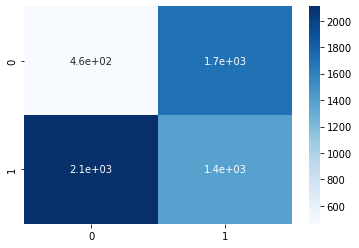

In [71]:
sns.heatmap(confusionMatrix,  annot = True, cmap ='Blues')